---
# Figure 4: 2018 imports and exports by volume
---


## Cargo transfers to/from WA marine terminals by vessel type

Use `analysis-rachael/env/monte_carlo.yaml` to create an environment for this notebook:
```
 conda env create -f [analysis-rachael/env/monte_carlo.yaml]
```
or, to activate this environment, use
```
 conda activate monte-carlo
```
To deactivate an active environment, use
```
 conda deactivate
```

This notebook relies on functions in `monte_carlo_utils.py` and requires the inclusion of the directory with this script, namely `../../../scripts`, in PYTHONPATH, e.g.:
```
export PYTHONPATH=$PYTHONPATH:/path/to/analysis-rachael/scripts
```
or uncommenting the following lines to import the scripts directory using sys: 
```
import sys
sys.path.insert(0, '../../../scripts')
```

In [1]:
import pandas as pd
import numpy as np
import cmocean.cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pathlib import Path
import yaml
import os

# load my function(s) and setup files
import sys
# graphics style
plt.style.use(r"../../style_templates/JGR2023_matplotlibrc.template")
# predefined naming conventions
import JGR_setup as oil
sys.path.insert(0, '../../scripts')
from monte_carlo_utils import get_DOE_quantity_byfac, get_ECY_df, get_ECY_oilclassification, assign_facility_region

# conversion factor
gal2liter = 3.78541

In [2]:
if os.sys.platform=="darwin":
    graphics_directory = Path(
         '/Users/rmueller/Projects/MIDOSS/Publications/MIDOSS_MuellerEtAl/JGR_graphics'
    )
    yaml_input = Path(
        '/Users/rmueller/Data/MIDOSS/marine_transport_data'
    )
    ecy_data  = Path('/Users/rmueller/Data/MIDOSS/DeptOfEcology/MuellerTrans4-30-20.xlsx')
    fac_names = Path('/Users/rmueller/Data/MIDOSS/marine_transport_data/Oil_Transfer_Facilities.xlsx')
else:
    raise ValueError('need to define ecy_data')
    # User inputs
    yaml_input = Path('/data/MIDOSS/marine_transport_data/')
    graphics_directory = Path(
        '/ocean/rmueller/MIDOSS/graphics/MEOPAR_ASM_2022'
    )
    ecy_data  = Path('/data/MIDOSS/spreadsheets/MuellerTrans4-30-20.xlsx')
    fac_names = Path('/data/MIDOSS/marine_transport_data/Oil_Transfer_Facilities.xlsx')

# open oil_attribution.yaml for paths
oil_attribution_file = yaml_input / 'oil_attribution.yaml'
with open(oil_attribution_file) as file:
            oil_attrs = yaml.load(file, Loader=yaml.Loader) 

In [3]:
# define vessel and oil types to include in .yaml file
vessel_types = ['atb', 'barge', 'tanker']
oil_types    = oil.types
data_types    = ['total_gallons', 'fraction_of_total', 'number_of_transfers']

In [4]:
[exports, imports, combined]=get_DOE_quantity_byfac(
    ecy_data, 
    fac_names,  
    facilities='selected'
)

get_DOE_quantity_byfac: not yet tested with fac_xls as input
Tallying atb quantities
Tallying barge quantities
Tallying tanker quantities


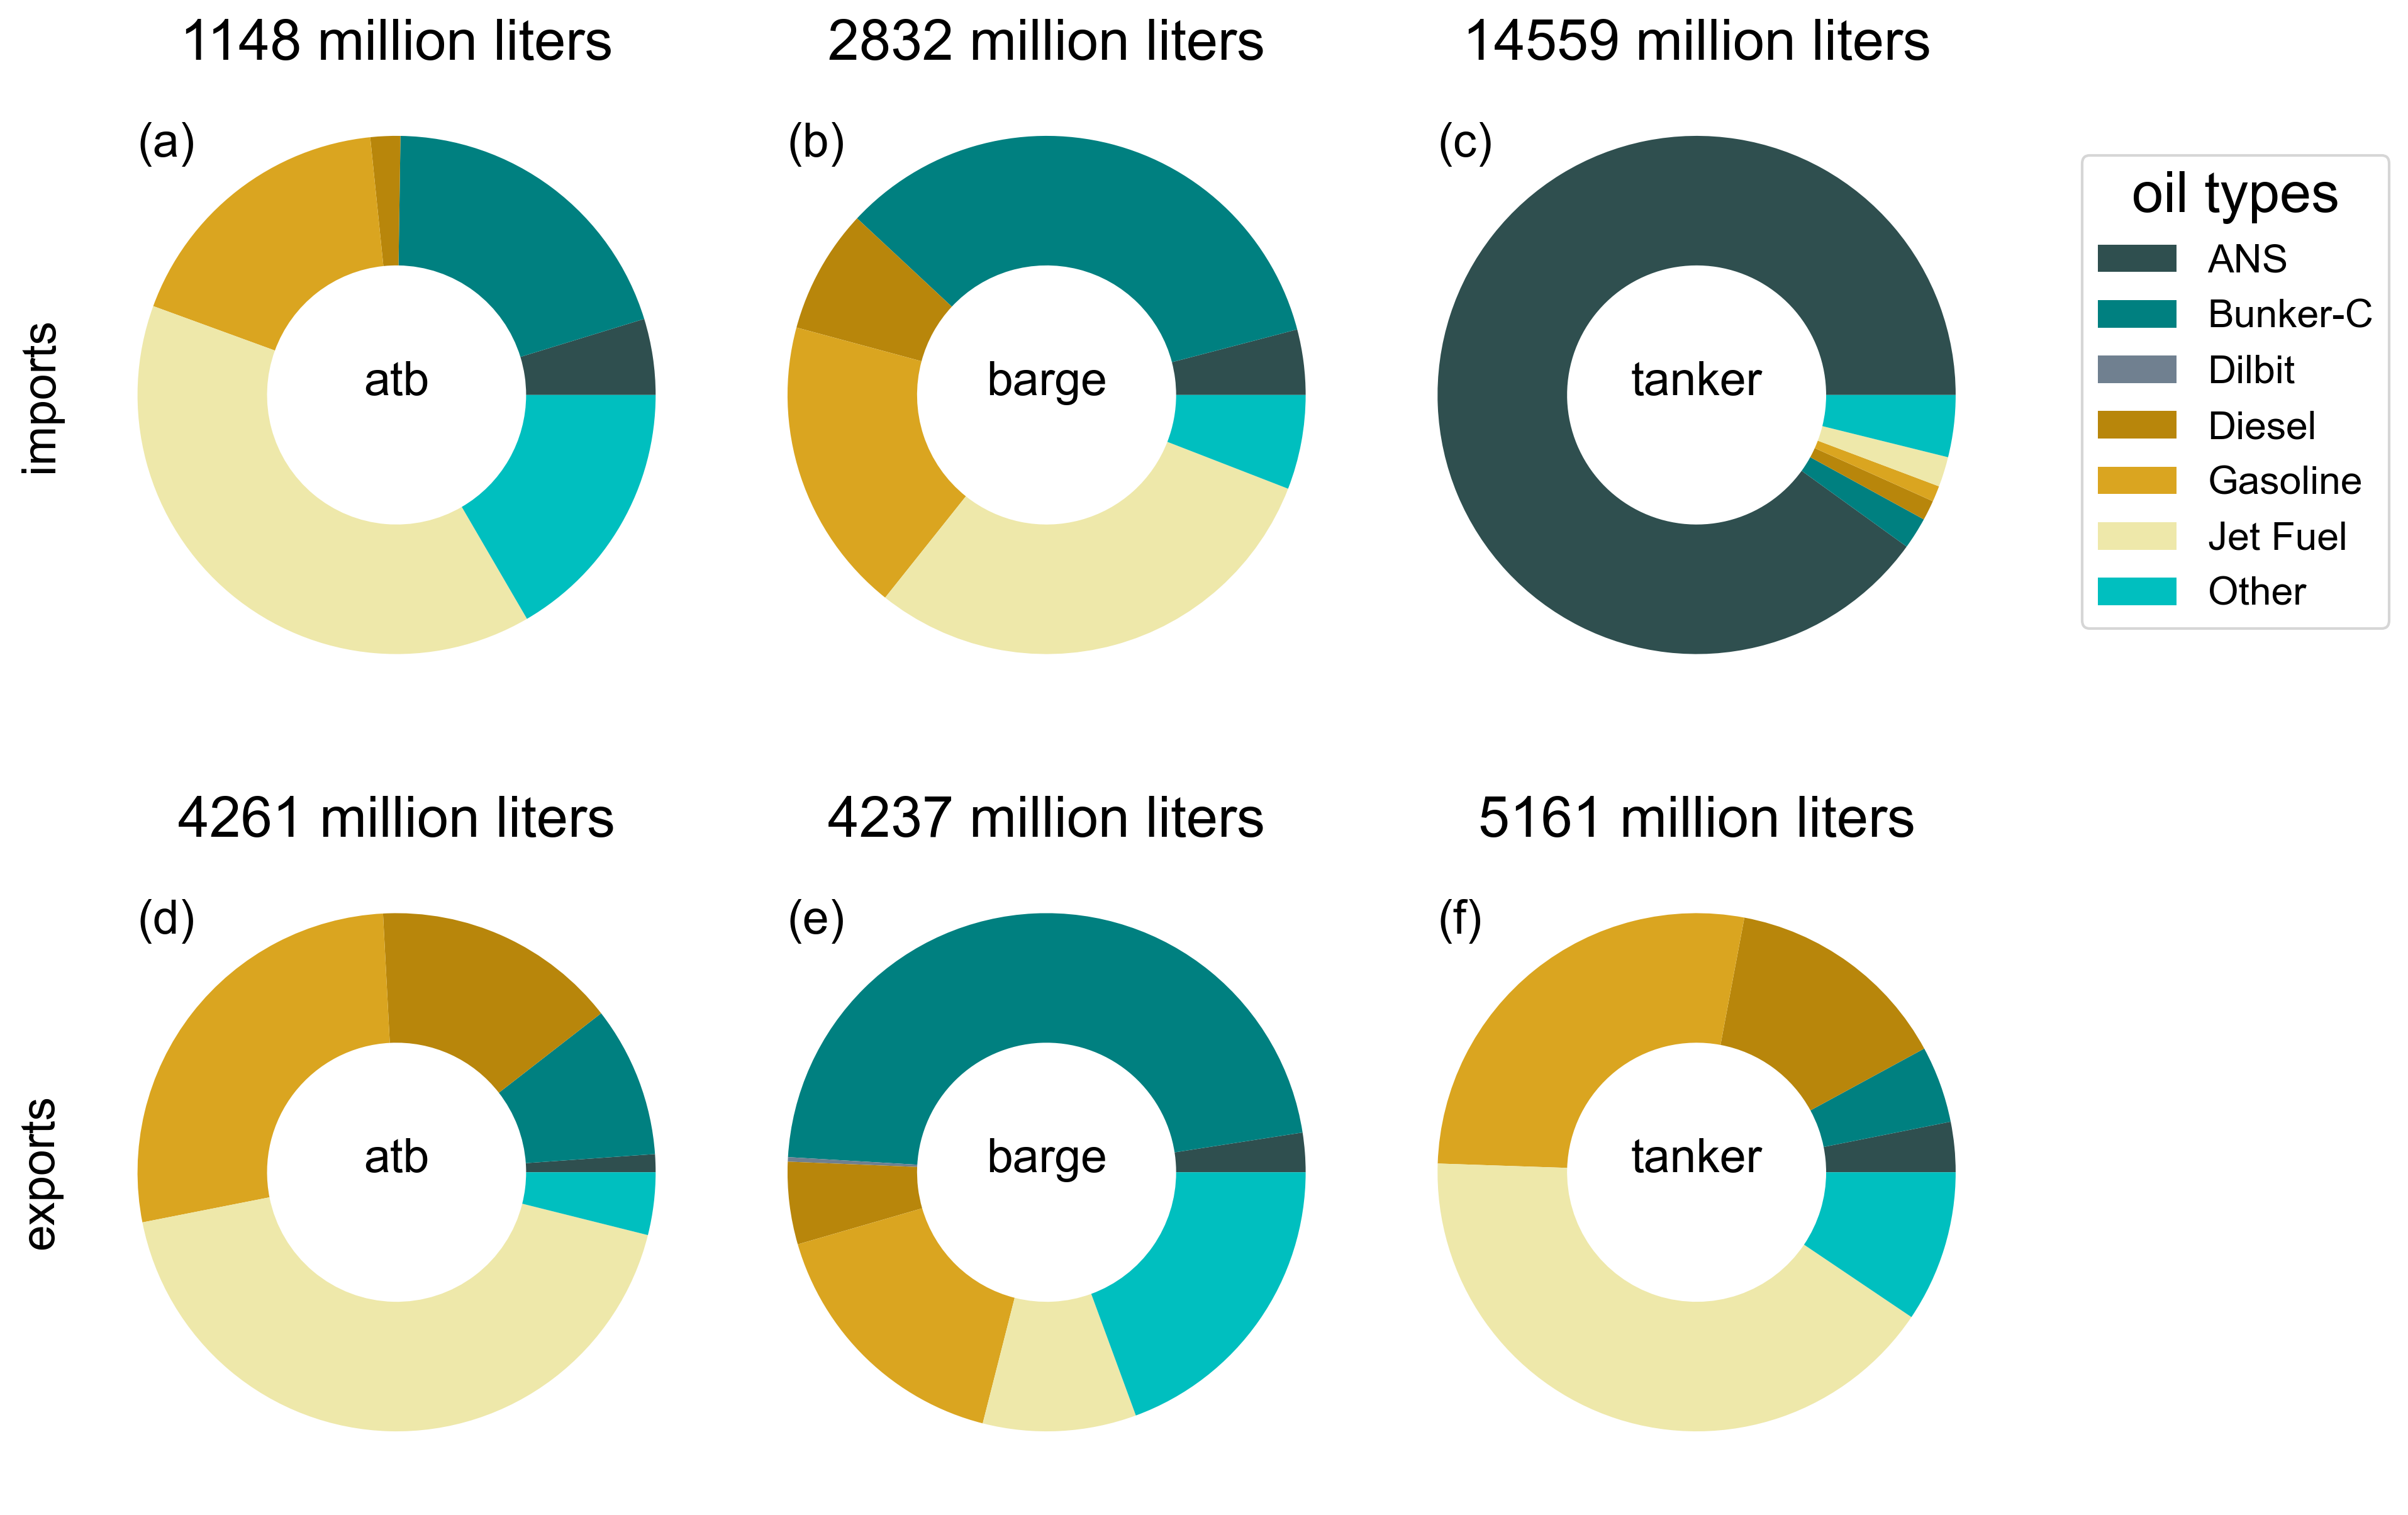

In [5]:
nc=3 #number of columns
fig = plt.figure() 
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(10)
# set width of each subplot as 8
fig.set_figwidth(20)
fig.tight_layout
# create grid for different subplots
spec = gridspec.GridSpec(ncols=nc, nrows=2,wspace=-.6,
                         hspace=0.2,width_ratios=np.ones(nc),
                         height_ratios=[1,1])
ax={}
for ind in np.arange(nc*2):
    ax[ind] = fig.add_subplot(spec[ind])

plt.rcParams['axes.titlepad'] = -18  # pad is in points...

for j,vessel in enumerate(vessel_types):
            
    ax[j].axis('tight')
    ax[j+nc].axis('tight')
    
    # create array of total oil volume by oil type for each vessel at each facility
    plot_imports=np.array([v for v in imports[vessel].values()])
    plot_exports=np.array([v for v in exports[vessel].values()])
    # imports
    ax[j].pie(
        plot_imports, 
        wedgeprops=dict(width=0.5), 
        labels = None,
        colors=oil.colors7
    )
    # exports
    ax[j+nc].pie(
        plot_exports, 
        wedgeprops=dict(width=0.5), 
        labels = None,
        colors=oil.colors7
    )
    
    vessel = vessel_types[j]
    ax[j].set_title(f'{gal2liter*plot_imports.sum()/1e6:2.0f} million liters')
    ax[j+nc].set_title(f'{gal2liter*plot_exports.sum()/1e6:2.0f} million liters')
    ax[j].text(0,0,vessel,ha='center')
    ax[j+nc].text(0,0,vessel,ha='center')
           
ax[0].set_ylabel('imports')
ax[nc].set_ylabel('exports')
ax[0].text(-1,0.92,'(a)')
ax[1].text(-1,0.92,'(b)')
ax[2].text(-1,0.92,'(c)')
ax[nc].text(-1,0.92,'(d)')
ax[nc+1].text(-1,0.92,'(e)')
ax[nc+2].text(-1,0.92,'(f)')
ax[2].legend(
    bbox_to_anchor=(1.6, 0.9),
    title='oil types',
    labels = oil.labels
)
plt.savefig(graphics_directory/'Figure4_MuellerEtAl_JGR-O_liters.png')

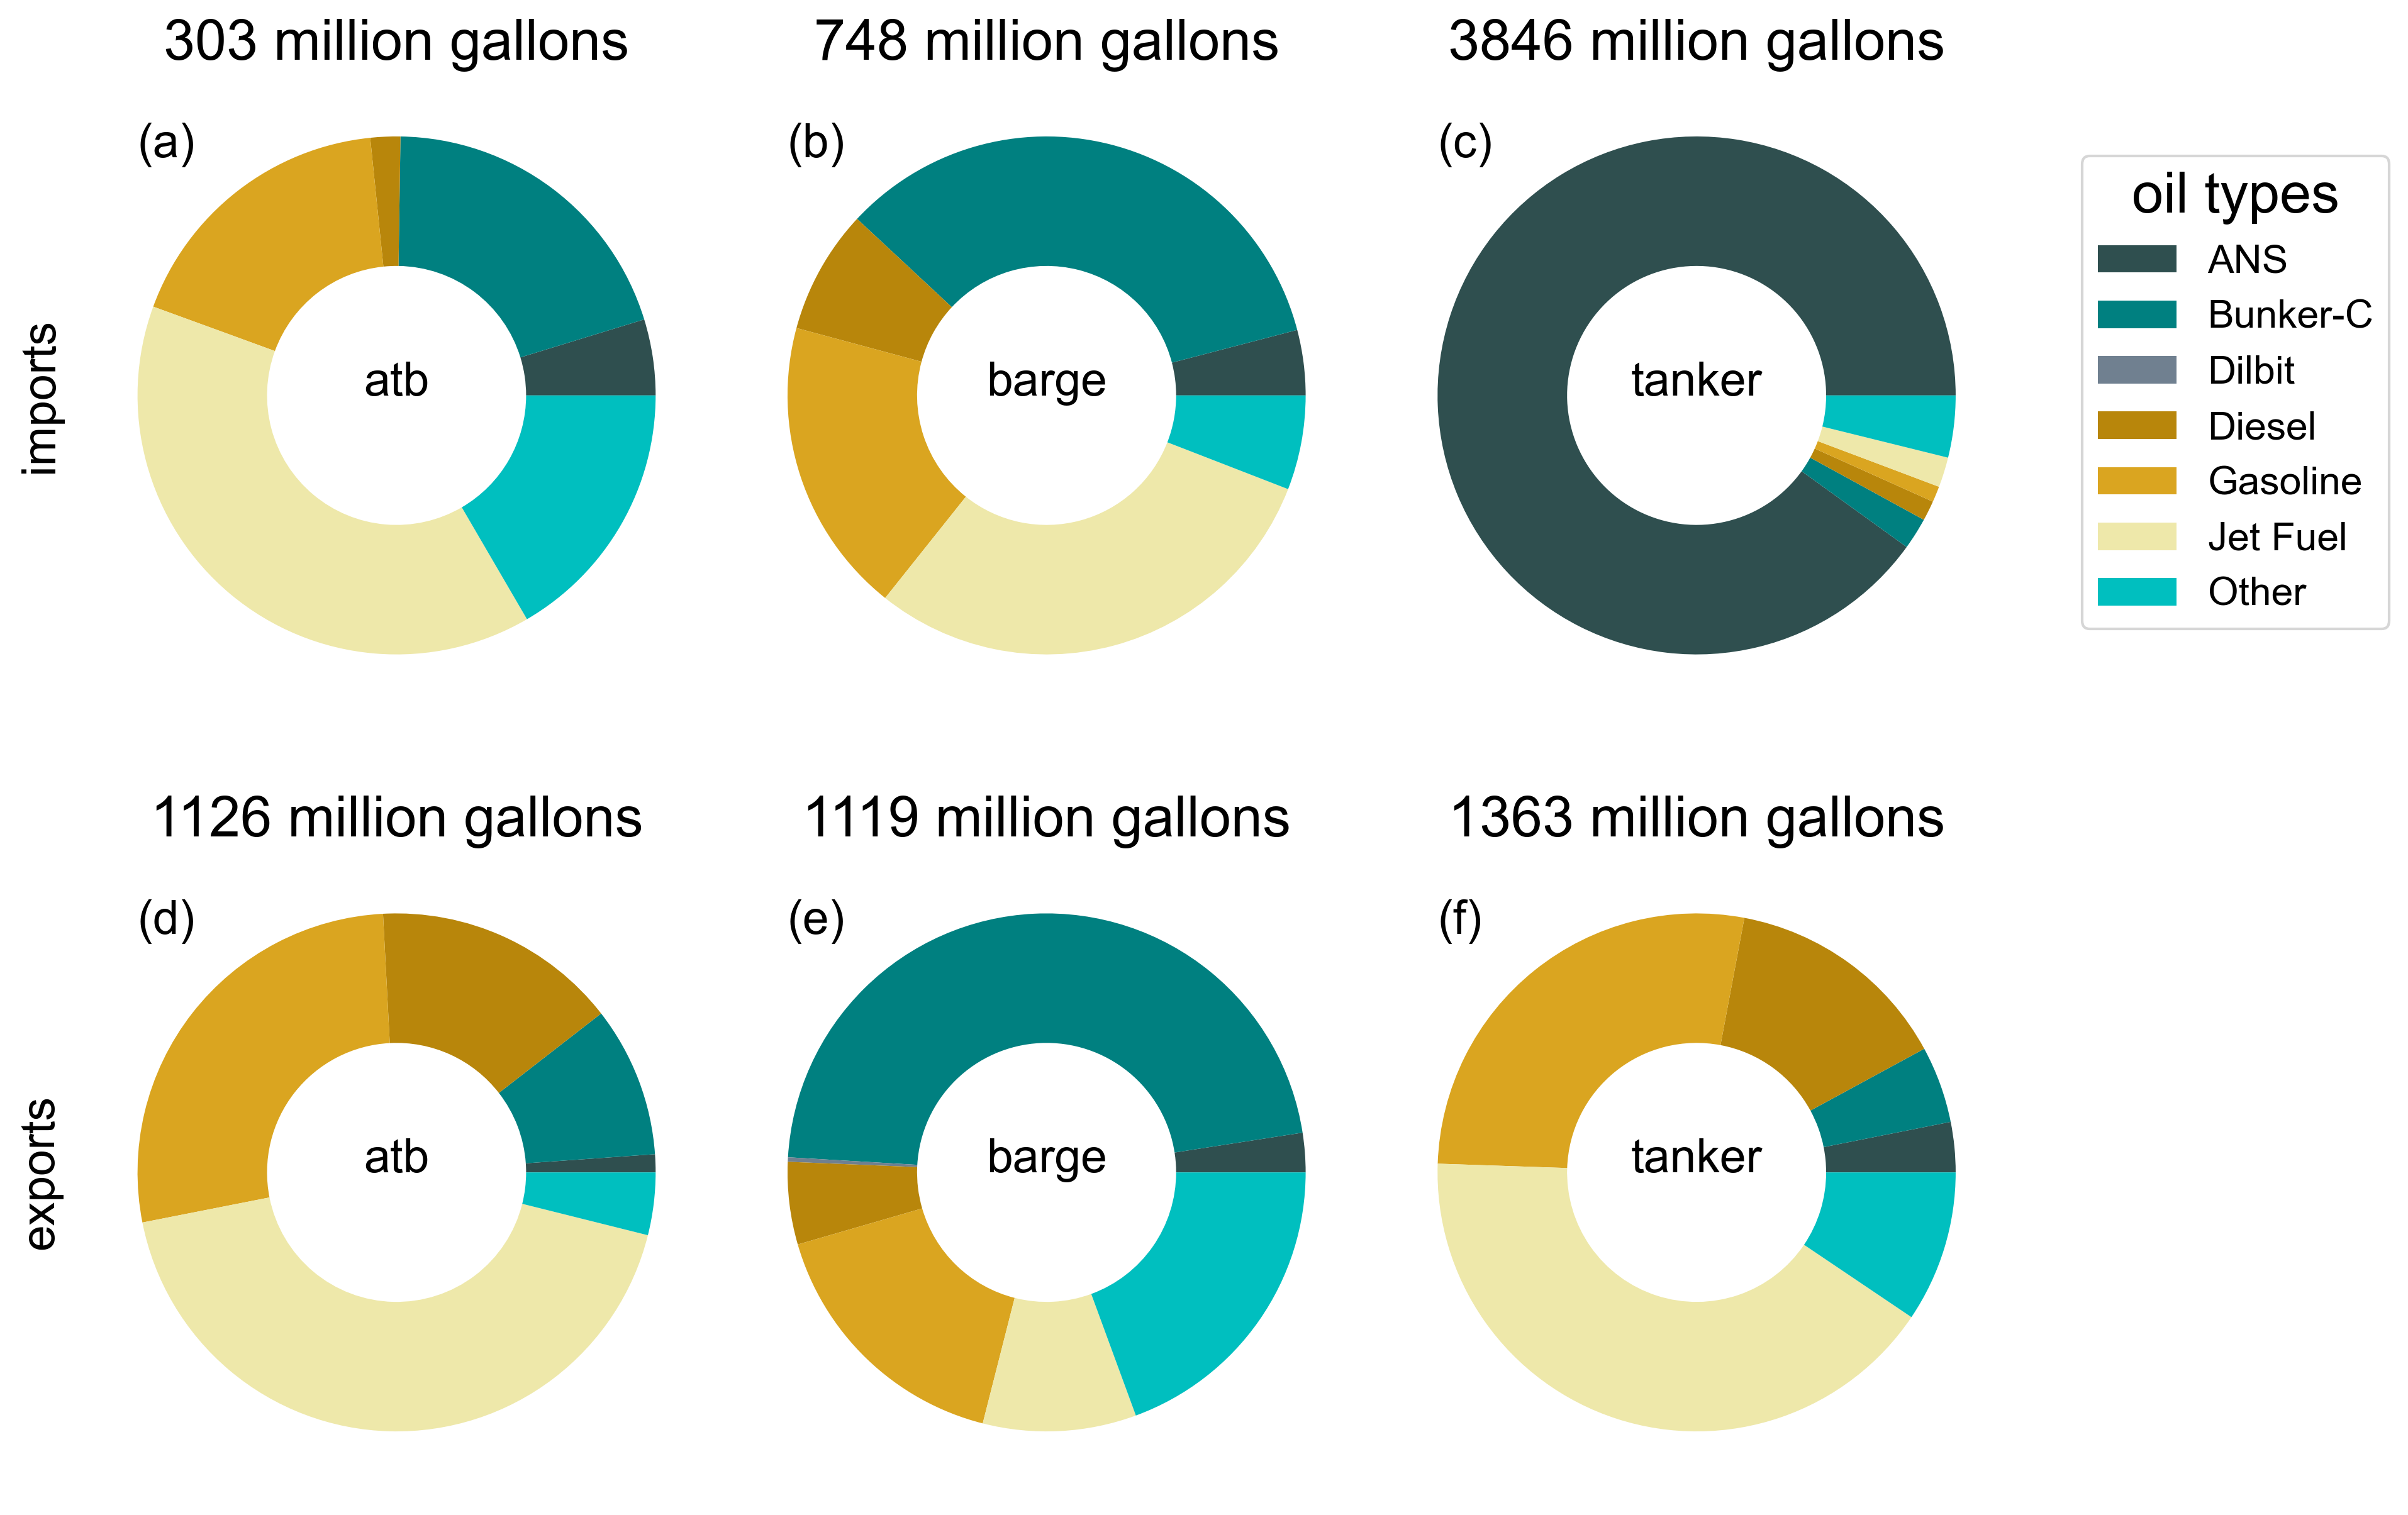

In [6]:
fig = plt.figure() 
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(10)
# set width of each subplot as 8
fig.set_figwidth(20)
fig.tight_layout
# create grid for different subplots
spec = gridspec.GridSpec(ncols=nc, nrows=2,wspace=-.6,
                         hspace=0.2,width_ratios=np.ones(nc),
                         height_ratios=[1,1])
ax={}
for ind in np.arange(nc*2):
    ax[ind] = fig.add_subplot(spec[ind])

plt.rcParams['axes.titlepad'] = -18  # pad is in points...

for j,vessel in enumerate(vessel_types):
            
    ax[j].axis('tight')
    ax[j+nc].axis('tight')
    
    # create array of total oil volume by oil type for each vessel at each facility
    plot_imports=np.array([v for v in imports[vessel].values()])
    plot_exports=np.array([v for v in exports[vessel].values()])
    # imports
    ax[j].pie(
        plot_imports, 
        wedgeprops=dict(width=0.5), 
        labels = None,
        colors=oil.colors7
    )
    # exports
    ax[j+nc].pie(
        plot_exports, 
        wedgeprops=dict(width=0.5), 
        labels = None,
        colors=oil.colors7
    )
    
    vessel = vessel_types[j]
    ax[j].set_title(f'{plot_imports.sum()/1e6:2.0f} million gallons')
    ax[j+nc].set_title(f'{plot_exports.sum()/1e6:2.0f} million gallons')
    ax[j].text(0,0,vessel,ha='center')
    ax[j+nc].text(0,0,vessel,ha='center')
           
ax[0].set_ylabel('imports')
ax[nc].set_ylabel('exports')
ax[0].text(-1,0.92,'(a)')
ax[1].text(-1,0.92,'(b)')
ax[2].text(-1,0.92,'(c)')
ax[nc].text(-1,0.92,'(d)')
ax[nc+1].text(-1,0.92,'(e)')
ax[nc+2].text(-1,0.92,'(f)')
ax[2].legend(
    bbox_to_anchor=(1.6, 0.9),
    title='oil types',
    labels = oil.labels
)
plt.savefig(graphics_directory/'Figure4_MuellerEtAl_JGR-O_gallons.png')

# regional map

In [7]:
import cartopy.crs
from cartopy import feature
import xarray

In [8]:
georef = xarray.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02")
mesh_mask = xarray.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02")
water_mask = mesh_mask.tmaskutil.isel(time=0)
fields = xarray.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV19-05")
salinity = fields.salinity.sel(time="2020-08-14 14:30", depth=0, method="nearest").where(water_mask)

In [9]:
salinity.max()

<xarray.DataArray 'salinity' ()>
array(32.18426895)
Coordinates:
    depth    float32 0.5

In [10]:
# define latitude bins
lat_partition = [46.9, 48.3, 48.7]
# regional tags
regions = ['Columbia River','Puget Sound','Anacortes','Whatcom County']

In [11]:
fac_df = assign_facility_region(fac_names)

In [12]:
whatcom_fac_df    = fac_df[fac_df['Region']=='Whatcom County']
anacortes_fac_df  = fac_df[fac_df['Region']=='Anacortes']
pugetsound_fac_df = fac_df[fac_df['Region']=='Puget Sound']
whatcom_fac_df

,FacilityName,FacilityDOEName,DockLatNumber,DockLongNumber,Region
0,BP Cherry Point Refinery,BP Cherry Point Refinery,48.86111,-122.758,Whatcom County
8,Phillips 66 Ferndale Refinery,Phillips 66 Ferndale Refinery,48.82600,-122.720,Whatcom County


In [13]:
DOEdf=get_ECY_df(
    ecy_data, 
    fac_names,  
    group='no'
)
oil_classification = get_ECY_oilclassification(
    ecy_data
)
type_description = ['TANK BARGE','TUGBOAT','TANK SHIP']
facility_names = oil_attrs['categories']['US_origin_destination']

In [14]:
# remove Grey's Harbor and Port Angeles terminals for better North/South representation
facility_names.remove('REG Grays Harbor, LLC')
facility_names.remove('Tesoro Port Angeles Terminal')

In [15]:
exports_byOil={}
imports_byOil={}
for oil_type in oil.types: 
    exports_byOil[oil_type] = DOEdf.loc[
        (DOEdf.TransferType == 'Cargo') &
        (DOEdf.ReceiverTypeDescription.isin(type_description)) & 
        (DOEdf.Deliverer.isin(facility_names)) & 
        (DOEdf.Product.isin(oil_classification[oil_type])), 
        ['TransferQtyInGallon', 'ExportRegion']
    ].groupby('ExportRegion').sum()
    imports_byOil[oil_type] = DOEdf.loc[
        (DOEdf.TransferType == 'Cargo') &
        (DOEdf.DelivererTypeDescription.isin(type_description)) & 
        (DOEdf.Receiver.isin(facility_names)) & 
        (DOEdf.Product.isin(oil_classification[oil_type])), 
        ['TransferQtyInGallon', 'ImportRegion']
    ].groupby('ImportRegion').sum()

In [16]:
exports_byRegion = {}
imports_byRegion = {}
combined_byRegion = {}
for region in regions:
    exports_byRegion[region]={}
    imports_byRegion[region]={}
    combined_byRegion[region]={}
    my_list_in = []
    my_list_out = []
    for oil_type in oil.types:
        try:
            my_list_in.append(imports_byOil[oil_type]['TransferQtyInGallon'].loc[region])
            my_list_out.append(exports_byOil[oil_type]['TransferQtyInGallon'].loc[region])
        except:
            my_list_in.append(0)
            my_list_out.append(0)
    my_array_in = np.asarray(my_list_in)
    my_array_out = np.asarray(my_list_out)
    imports_byRegion[region] = pd.DataFrame (my_array_in, columns = ['Volume'], index = oil.types)
    exports_byRegion[region] = pd.DataFrame (my_array_out, columns = ['Volume'], index = oil.types)
    
    combined_byRegion[region]=imports_byRegion[region]+exports_byRegion[region]
    #combined_byRegion[region]=combined_byRegion[region]*gallons_to_liters

/Users/rmueller/opt/miniconda3/envs/monte-carlo/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/var/folders/36/r7rkkw2567v70rmk6z0twn6r0000gp/T/ipykernel_36645/4198252245.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


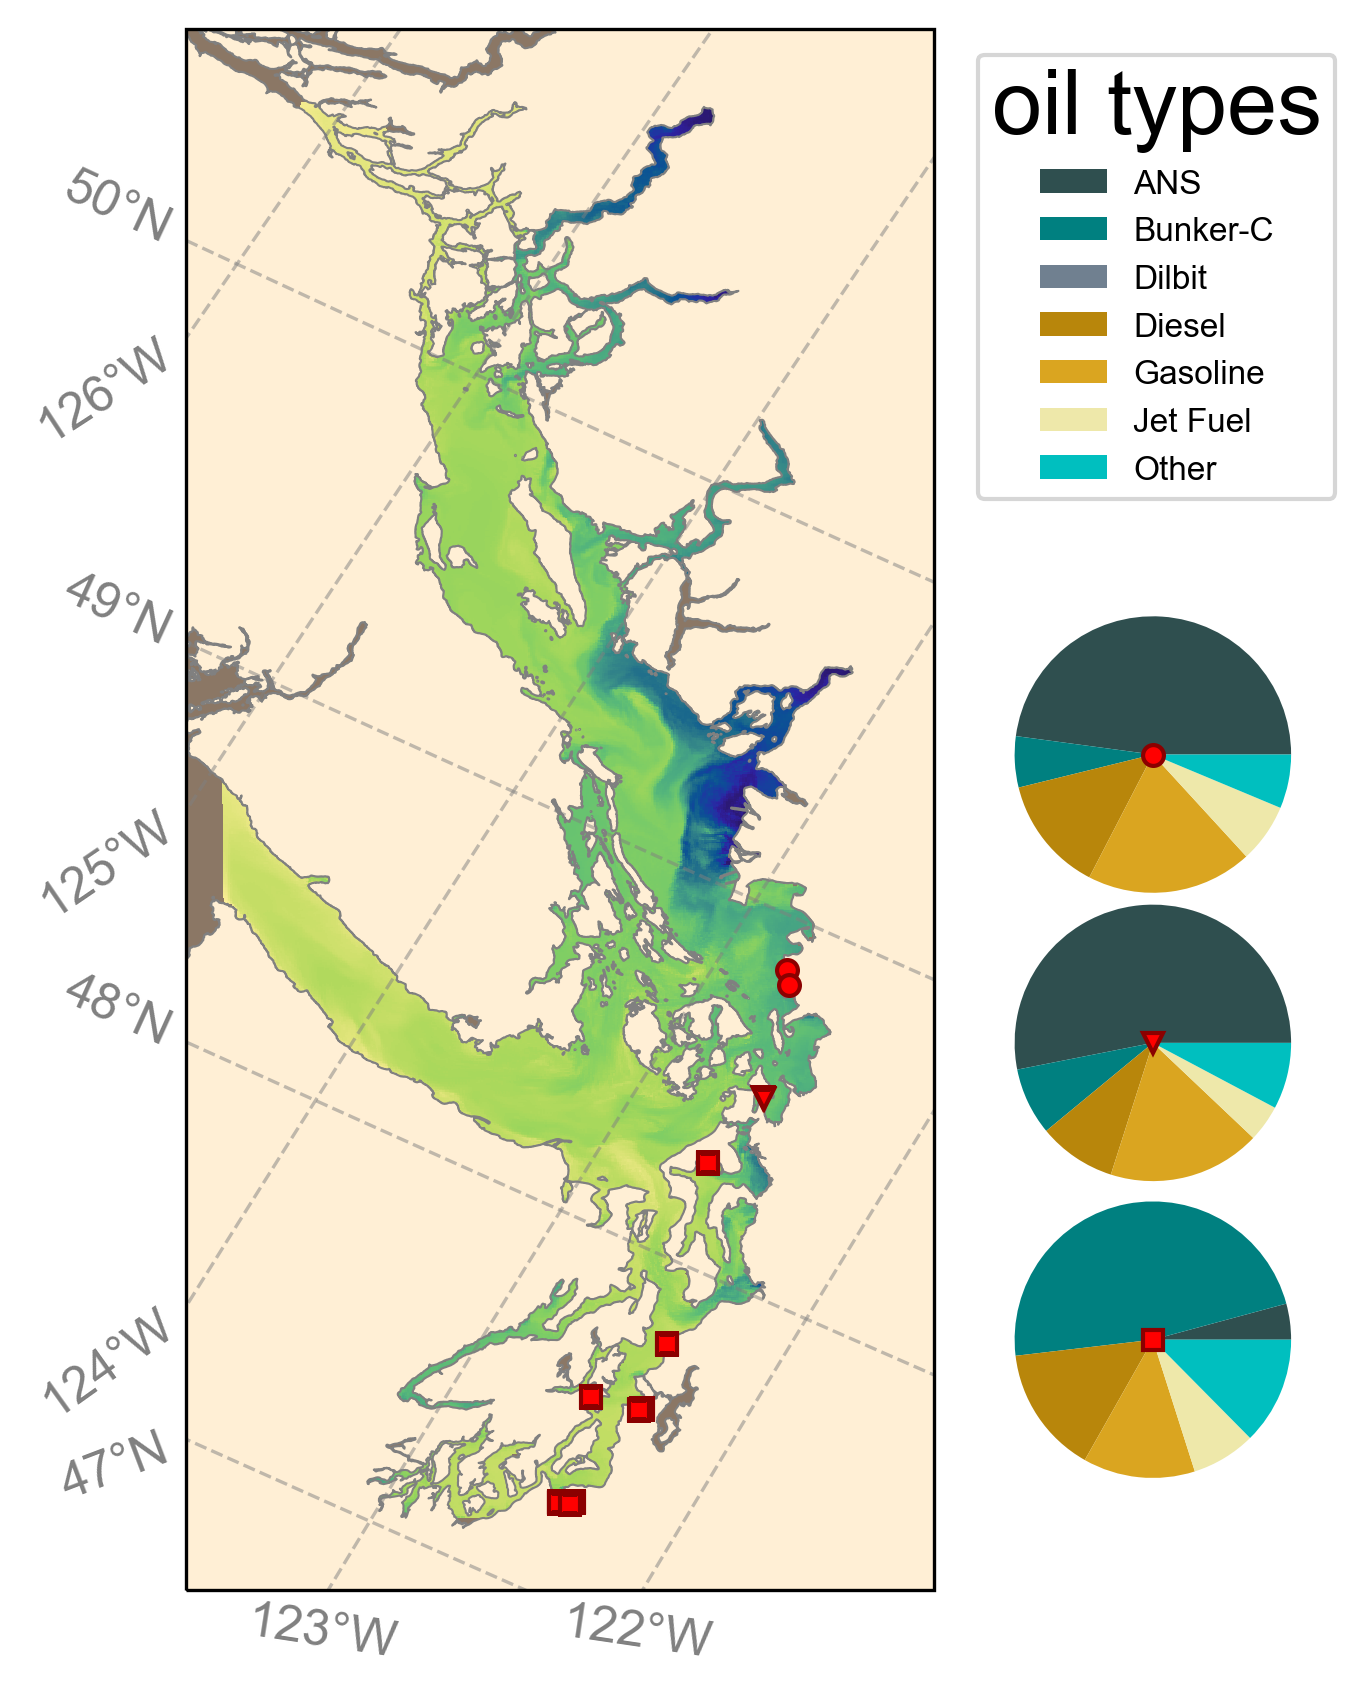

In [30]:
import cmocean.cm
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

lat={}
lat['whatcom'] = 48.88
lat['anacortes']=48.2
lat['puget']=47.5
lon=-122.758

# the offsets needed for indexing from lower left of graphic boundary
x0 = -0.10
y0 = -0.044

# mapping specifications
rotated_crs = cartopy.crs.RotatedPole(pole_longitude=120.0, pole_latitude=63.75)
plain_crs = cartopy.crs.PlateCarree()

fig,ax = plt.subplots(
    1, 1, figsize=(12, 6), subplot_kw={"projection": rotated_crs, "facecolor": "#8b7765"}
)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='grey', linewidth = 0.5, facecolor='papayawhip'))
quad_mesh = ax.pcolormesh(
    georef.longitude, georef.latitude, salinity, transform=plain_crs, cmap=cmocean.cm.haline, shading="auto"
)
gl = ax.gridlines(linestyle="--", color='gray', alpha=0.5, draw_labels=True, dms=True, x_inline=False, y_inline=False)
# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels, gl.right_labels = False, False
gl.xlocator = mticker.FixedLocator([-126, -125, -124, -123, -122])
gl.ylocator = mticker.FixedLocator([47,48,49,50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

# calculate location of marine terminal within graphic window
scale = 1.2
#~~~~~~~~~~~~~~~~ Whatcom ~~~~~~~~~~~~~~~~~~
xleft = ((lon - georef.longitude.min())/(georef.longitude.max() - georef.longitude.min())).values.item()
ybottom   = ((lat['whatcom'] - georef.latitude.min())/(georef.latitude.max() - georef.latitude.min())).values.item()

ax_whatcom = fig.add_axes([xleft+x0, ybottom+y0,.08*scale, .2*scale])
ax_whatcom.pie(combined_byRegion['Whatcom County']['Volume'], colors = oil.colors7)

#~~~~~~~~~~~~~~~~ Puget ~~~~~~~~~~~~~~~~~~
xleft = ((lon - georef.longitude.min())/(georef.longitude.max() - georef.longitude.min())).values.item()
ybottom   = ((lat['puget'] - georef.latitude.min())/(georef.latitude.max() - georef.latitude.min())).values.item()

ax_puget = fig.add_axes([xleft+x0, ybottom+y0,.08*scale, .2*scale])
ax_puget.pie(combined_byRegion['Puget Sound']['Volume'], colors = oil.colors7)

#~~~~~~~~~~~~~~~~ ANACORTES ~~~~~~~~~~~~~~~~~~
xleft = ((lon - georef.longitude.min())/(georef.longitude.max() - georef.longitude.min())).values.item()
ybottom   = ((lat['anacortes'] - georef.latitude.min())/(georef.latitude.max() - georef.latitude.min())).values.item()

ax_anacortes = fig.add_axes([xleft+x0, ybottom+y0,.08*scale, .2*scale])
ax_anacortes.pie(combined_byRegion['Anacortes']['Volume'], colors = oil.colors7)

fig.legend(
    bbox_to_anchor=(.72, .95),
    title='oil types',
    prop={'size': 8},
    labels = oil.labels
)

marker_color = "red"
markeredge_color = 'darkred'
# plot whatcom terminal locations and legend marker
ax.plot(
    whatcom_fac_df.DockLongNumber,
    whatcom_fac_df.DockLatNumber,
    'o', 
    color=marker_color, 
    markeredgecolor=markeredge_color, 
    markersize=5, 
    transform=plain_crs
)
ax_whatcom.plot(
    0,0,
    'o', 
    color=marker_color, 
    markeredgecolor=markeredge_color, 
    markersize=5
)

# plot puget sound terminal locations and legend marker
ax.plot(
    pugetsound_fac_df.DockLongNumber,
    pugetsound_fac_df.DockLatNumber,
    's', 
    color=marker_color, 
    markeredgecolor=markeredge_color, 
    markersize=5, 
    transform=plain_crs
)

ax_puget.plot(
    0,0,
    's', 
    color=marker_color, 
    markeredgecolor=markeredge_color, 
    markersize=5
)

# plot anacortes terminal locations and legend marker
ax.plot(
    anacortes_fac_df.DockLongNumber,
    anacortes_fac_df.DockLatNumber,
    'v', 
    color=marker_color, 
    markeredgecolor=markeredge_color, 
    markersize=5, 
    transform=plain_crs
)

ax_anacortes.plot(
    0,0,
    'v', 
    color=marker_color, 
    markeredgecolor=markeredge_color, 
    markersize=5
)

#ax_north.bar(oil_types, 1e1* numpy.ones(7), width = 1)
fig.canvas.draw()
fig.tight_layout()

plt.savefig(graphics_directory/'Figure4_MuellerEtAl_JGR-O_map.png')
plt.show()

In [18]:
whatcom_fac_df['FacilityName'].to_list()

['BP Cherry Point Refinery', 'Phillips 66 Ferndale Refinery']

In [19]:
anacortes_fac_df['FacilityName'].to_list()

['Shell Puget Sound Refinery', 'Marathon Anacortes Refinery (formerly Tesoro)']

In [20]:
pugetsound_fac_df['FacilityName'].to_list()

['Shell Oil LP Seattle Distribution Terminal',
 'Maxum Petroleum - Harbor Island Terminal',
 'Nustar Energy Tacoma',
 'SeaPort Sound Terminal',
 'Phillips 66 Tacoma Terminal',
 'U.S. Oil & Refining',
 'Naval Air Station Whidbey Island (NASWI)',
 'NAVSUP Manchester',
 'Alon Asphalt Company (Paramount Petroleum)',
 'Kinder Morgan Liquids Terminal - Harbor Island',
 'TLP Management Services LLC (TMS)']